## Simple Epidemic Model
* source
https://www.youtube.com/watch?v=gSqIwXl6IjQ

### Assumptions: 
1. The population has no prior immunity
2. All individuals are similar in terms of susceptibility and infectivity and mix uniformity
3. Recovered individuals becomes immune.
4. No behavioural changes during course of epidemic

### Model
* Discrete time. (week by week, or here abstract into step by step)
* $N$ popluation size.
* Start 1 infectious, $N-1$ susceptible
* Every infectious indiviual infect all the rest of population with probability $p$ during each time step and then **recover**. So essentially every timestep it is only the newly infected from the last timestep that are infectious.
* Goes on till no new infected.

### Basic reproduction numner $R_0$
$R_0$: average number of new infections caused bu a typical infected during early phase of an outbreek.

\begin{align*}
R_0 = (N-1)*p
\end{align*}

If $N = 1000$ and $p = 0.0015$ then 
\begin{align*}
R_0 \sim 1.4985
\end{align*}

### Simulate the Model 10 000 times

In [25]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


In [190]:
# simulation
total_infected, time_steps = [],[]

for tt in range(10000):
    R = 999*0.0015
    i = 0
    s = 1 # number of sick person to start
    N = 1000 # population total
    del_s = s #start value of newly infected =s
    ppl_infected = [s]
    while del_s >0 and ppl_remain >0:
        ppl_remain = N-s
        i = i + 1
        nbr_trial, prob = del_s, 0.0015
        infections = np.random.binomial(nbr_trial, prob, ppl_remain)
        del_s = np.sum(infections >=1) # newly infected
        s = s + del_s # over all ever infected
        
    
    total_infected.append(s)
    time_steps.append(i)
df_1 = pd.DataFrame({'time_steps':time_steps,
                   'total_infected':total_infected
                  })

### Distribution of total infected

Text(0.5, 0, 'nbr_infection')

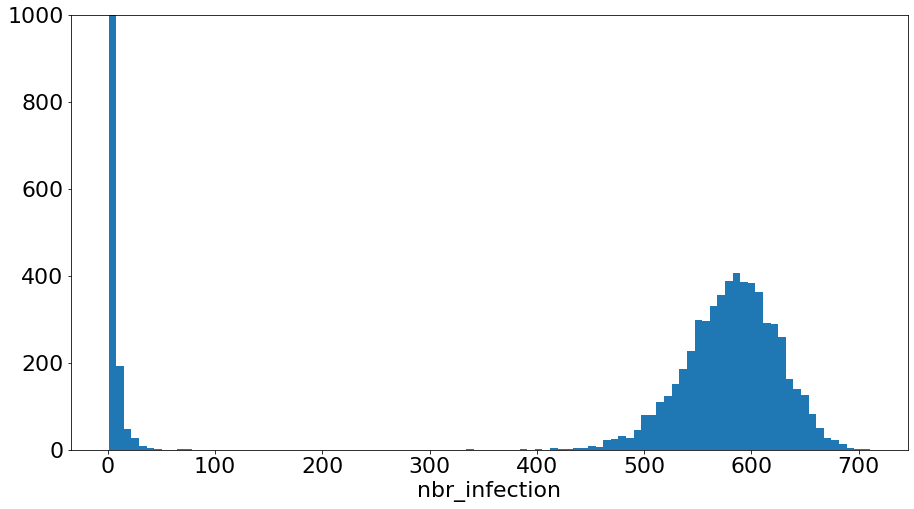

In [192]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(1,1,figsize = (15,8))
_ = ax.hist(df_1.total_infected, bins = 100)
plt.ylim([0,1000])
plt.xlabel('nbr_infection')

In [56]:
#_ = plt.hist(df.time_steps, bins = 100)
# plt.ylim([0,1000])

Text(0, 0.5, 'nbr_infection')

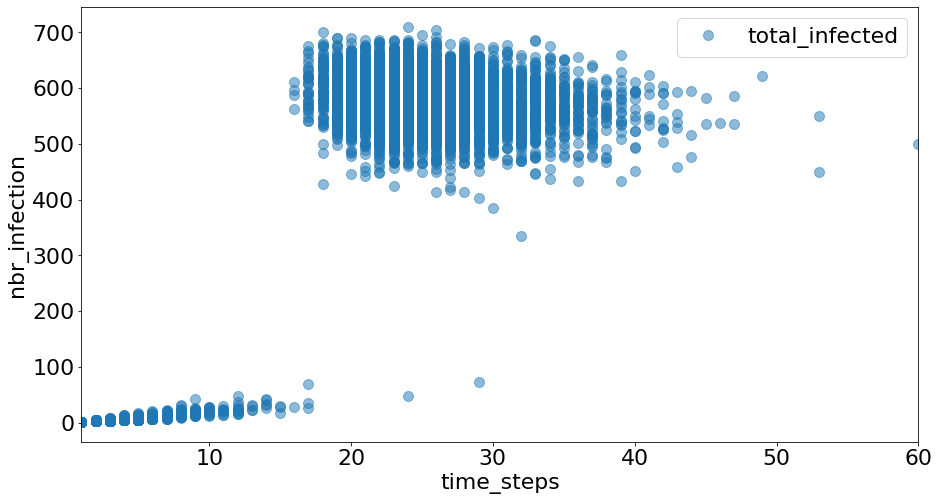

In [196]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(1,1,figsize = (15,8))
df_1.set_index('time_steps').plot(ax = ax, linestyle = 'None', marker = '.', ms = 20, alpha = 0.5)
plt.ylabel('nbr_infection')

Most of the cases, the epidemic last 20-40 timesteps (weeks) and affect 500-700 people

### Analytical solution for total infected population fraction $\tau$ 
Since $1-\tau$ should be the probability of not getting infected while exposed to $N\tau$ infectious trials, $\tau$ should satisfy the following condition:


\begin{align*}
 1 - \tau &= (1-p)^{N\tau} \\
      &= (1-\frac{R_0}{N})^{N\tau} \\
      &= e^{-R_0\tau}
\end{align*}

Solving numerically $\tau$, $R_0$ in range $\tau = 0 \sim 1$ given $R_0 = 0 \sim 10$:

In [127]:
def eq(tau, R):
    return np.abs(1-tau-np.exp(-R*tau))


In [116]:
tau = np.arange(0,1,0.001)
R = np.arange(0, 5, 0.01)
np.meshgrid(tau, R)[0].shape

(500, 1000)

In [117]:
tt, rr = np.meshgrid(tau, R)

In [118]:
rs = [R[i] for i in eq(tt, rr).argmin(axis = 0)]

Text(0, 0.5, 'tau')

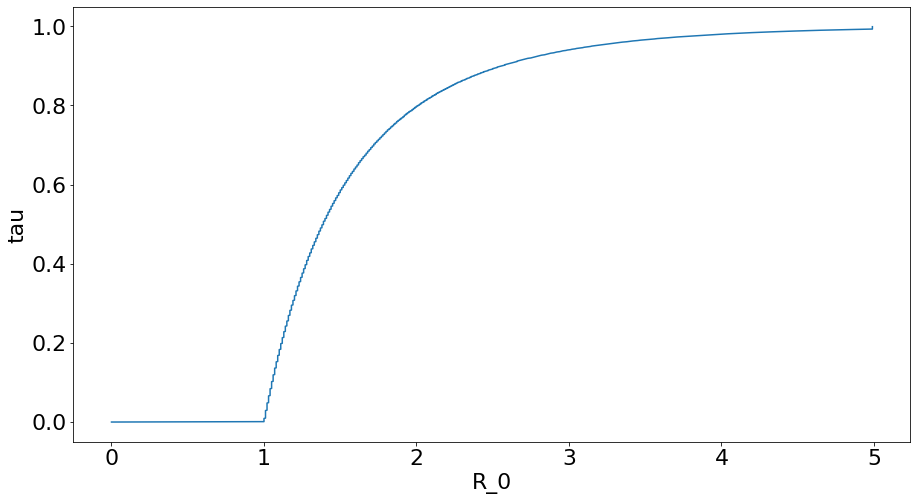

In [188]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(1,1,figsize = (15,8))
ax.plot(rs, tau)
plt.xlabel('R_0')
plt.ylabel('tau')

### Peak infection as influenced by $R_0$

$R_0$ can be factorized:

\begin{align*}
R_0 = pcl
\end{align*}
where
* $p$: transmission probability of a contact.   
* $c$: number of c "contacs" per day  
* $l$: duration of infectious period  

Prevention measures that decreases $R_0$:  

* $p$: face mask, hand-washing, condom ...
* $c$: quarantine, avoid crowds, avoid public transports ...
* $l$: quicker diagnosis, isolation

Given 100 timesteps (weeks) get peak infections graph by simulating 1000 times. 

In [177]:

n_simulations = 1000
n_timesteps = 100
infection_cases = np.zeros(n_timesteps)

dfs = []
for R in (0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25):
    for tt in range(n_simulations):
        s = 1 # number of sick person to start
        N = 1000 # population total
        del_s = s #start value of newly infected =s
        ppl_infected = np.zeros(n_timesteps)
        ppl_infected[0] = s
        for timestep in np.arange(n_timesteps-1):
            if del_s >0 and ppl_remain >0:
                ppl_remain = N-s
                nbr_trial, prob = del_s, R/N
                infections = np.random.binomial(nbr_trial, prob, ppl_remain)
                del_s = np.sum(infections >=1) # newly infected
                ppl_infected[timestep+1] = del_s
                s = int(ppl_infected.sum())
        infection_cases = infection_cases+ppl_infected

    infection_cases = infection_cases/n_simulations
    dfs.append(pd.DataFrame({f'R = {R}':infection_cases}))
df = pd.concat(dfs, axis = 1)

Text(0, 0.5, 'newly infected')

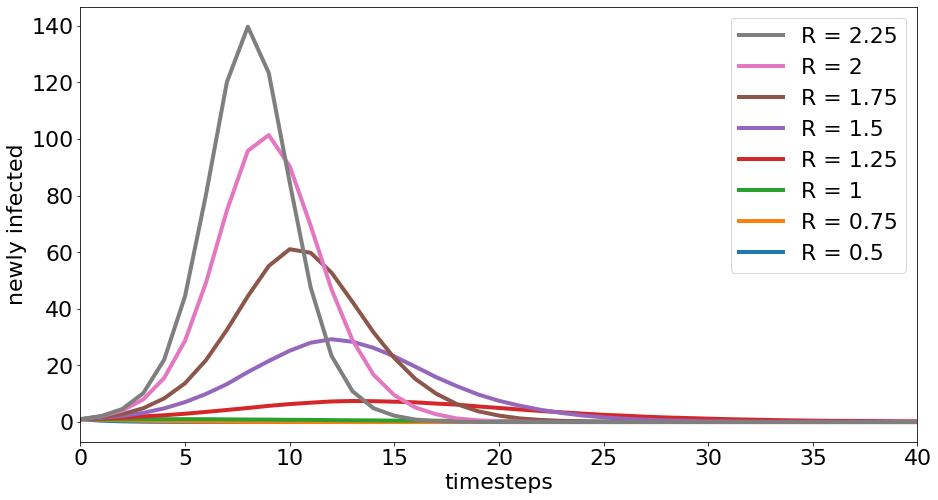

In [198]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(1,1,figsize = (15,8))
df.plot(ax = ax, linewidth = 4)
plt.xlim([0, 40])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best')
plt.xlabel('timesteps')
plt.ylabel('newly infected')


With $R_0$ reduced, the peak can be much smaller and much delayed.